# TOPAS-nBio Analysis Toolkit for DNA Damage Output

This notebook demonstrates how to use the dnadamage_phsp_manager.py and sddparser.py functions to analyze DNA damage output from TOPAS-nBio simulations.

In [1]:
import sys
import os
import pathlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pprint

# Import our custom modules
from dnadamage_phsp_manager import *
import sddparser

## 1. Single Run Analysis

Read and analyze a single run of DNADamage output.

In [2]:
# Define file paths (using the paths from my_tests.py)
base_path = "/home/radiofisica/hector/mytopassimulations/tests/run1-med1-cell1/DNADamage"
#base_path = "/home/radiofisica/hector/mytopassimulations/TOPAS_CellsNPs/work/TestCellColony/cell1/run1/DNADamage"

# Read the phase space data
df = read_dnadamage_phase_space(base_path)

# Display the dataframe head
print("DNA Damage phase space data:")
df.head()

DNA Damage phase space data:


,Energy_imparted_per_event [keV],Dose_per_event_Gy,DSB/Gy/Gbp,SSB/Gy/Gbp,SB/Gy/Gbp,SSB+/Gy/Gbp,DSB+/Gy/Gbp,MoreComplexDamage/Gy/Gbp,BD/Gy/Gbp,DSBs,...,SBs_Indirect,SSB+s,DSB+s,More complex damages,BDs,BDs_Direct,BDs_QuasiDirect,BDs_Indirect,Foci_150nm,Foci_500nm
0,5.38223,0.002397,0.0,68.63960,68.63960,0.0000,0.0,0,137.2790,0,...,1,0,0,0,2,1,0,1,0,0
1,23.97760,0.011541,0.0,156.82200,156.82200,14.2565,0.0,0,370.6690,0,...,7,1,0,0,26,6,2,20,0,0
2,11.32730,0.016076,0.0,61.40760,61.40760,10.2346,0.0,0,112.5810,0,...,5,1,0,0,11,0,0,11,0,0
3,1.64585,0.016703,0.0,9.85033,9.85033,0.0000,0.0,0,19.7007,0,...,0,0,0,0,2,0,0,2,0,0
4,1.56312,0.018222,0.0,18.05820,18.05820,0.0000,0.0,0,36.1165,0,...,1,0,0,0,4,0,0,4,0,0


Total damage statistics:
Total number of events: 1134
Total energy deposited: 8.66 MeV
Total DSBs: 131
Total DSBs_Direct: 36
Total DSBs_Indirect: 28
Total DSBs_Hybrid: 67
Total DSBs_Direct_WithOneQuasiDirect: 15
Total DSBs_Direct_WithBothQuasiDirect: 2
Total DSBs_Hybrid_WithOneQuasiDirect: 28
Total SSBs: 2935
Total SSBs_Direct: 1049
Total SSBs_QuasiDirect: 307
Total SSBs_Indirect: 1886
Total SBs: 3197
Total SBs_Direct: 1188
Total SBs_QuasiDirect: 354
Total SBs_Indirect: 2009
Total SSB+s: 126
Total DSB+s: 1
Total More complex damages: 0
Total BDs: 7071
Total BDs_Direct: 1404
Total BDs_QuasiDirect: 708
Total BDs_Indirect: 5667
Total Foci_150nm: 71033
Total Foci_500nm: 71033


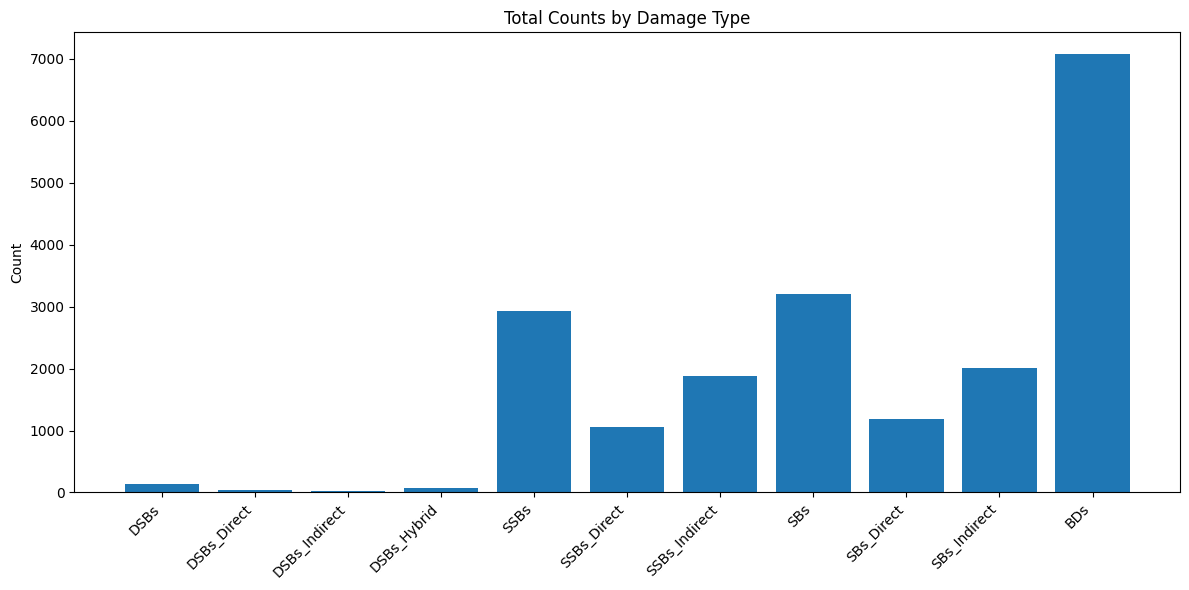

In [3]:
# Calculate and display total damage statistics
print("Total damage statistics:")
total_damage(df)

# Plot the distribution of damage types
damage_columns = [
    'DSBs', 'DSBs_Direct', 'DSBs_Indirect', 'DSBs_Hybrid',
    'SSBs', 'SSBs_Direct', 'SSBs_Indirect',
    'SBs', 'SBs_Direct', 'SBs_Indirect',
    'BDs'
]

# Create a subset of damage columns that are actually in our dataframe
available_damage_columns = [col for col in damage_columns if col in df.columns]

# Calculate total counts for each damage type
damage_totals = {col: df[col].sum() for col in available_damage_columns}

# Plot as a bar chart
plt.figure(figsize=(12, 6))
plt.bar(damage_totals.keys(), damage_totals.values())
plt.xticks(rotation=45, ha='right')
plt.title('Total Counts by Damage Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## 2. SDD File Analysis

Parse and analyze a Standard DNA Damage (SDD) file using sddparser.

In [4]:
# Define SDD file path
sdd_file = "/home/radiofisica/hector/mytopassimulations/tests/run1-med1-cell1/DNADamage_sdd.txt"
verbose = False

# Parse the SDD file
header, events = sddparser.parseSDDFileFlat(sdd_file, verbose)

# Display header information
print("=== SDD Header Information ===")
pp = pprint.PrettyPrinter(indent=2)
pp.pprint(header)

=== SDD Header Information ===
{ 'Additional Information': '',
  'Author': 'Name',
  'Cell Cycle Phase': 0.0,
  'Chromosomes': [ 46,
                   [ 252.823,
                     252.823,
                     248.157,
                     248.157,
                     204.04,
                     204.04,
                     195.556,
                     195.556,
                     184.951,
                     184.951,
                     174.77,
                     174.77,
                     162.469,
                     162.469,
                     149.318,
                     149.318,
                     143.38,
                     143.38,
                     138.289,
                     138.289,
                     137.441,
                     137.441,
                     135.32,
                     135.32,
                     116.655,
                     116.655,
                     108.595,
                     108.595,
                     102.656,
     


=== First 3 Events ===

Event #1:
{ 'Cause': [0, 1, 0],
  'Chromosome ID': [1, 20, 1, 0],
  'Chromosome Position': 0.164863011717,
  'Damage Spec': [['3', '1', '1']],
  'Damage Types': [1, 10, 0],
  'EID': 6056,
  'NewEvent': 2,
  'Pos': [ [1.49351, 3.79773, 0.211926],
           [1.49351, 3.79773, 0.211926],
           [1.49351, 3.79773, 0.211926]]}

Event #2:
{ 'Cause': [1, 0, 1],
  'Chromosome ID': [1, 20, 1, 0],
  'Chromosome Position': 0.52347649708,
  'Damage Spec': [['2', '1', '2']],
  'Damage Types': [1, 10, 0],
  'EID': 6056,
  'NewEvent': 0,
  'Pos': [ [2.870575, 2.865732, 0.455114],
           [2.870575, 2.865732, 0.455114],
           [2.870575, 2.865732, 0.455114]]}

Event #3:
{ 'Cause': [1, 0, 1],
  'Chromosome ID': [1, 26, 1, 0],
  'Chromosome Position': 0.03143581501,
  'Damage Spec': [['3', '3', '0'], ['4', '1', '2']],
  'Damage Types': [0, 11, 0],
  'EID': 6056,
  'NewEvent': 0,
  'Pos': [ [1.016161, 4.411266, 0.430724],
           [1.016161, 4.411266, 0.430724],
   

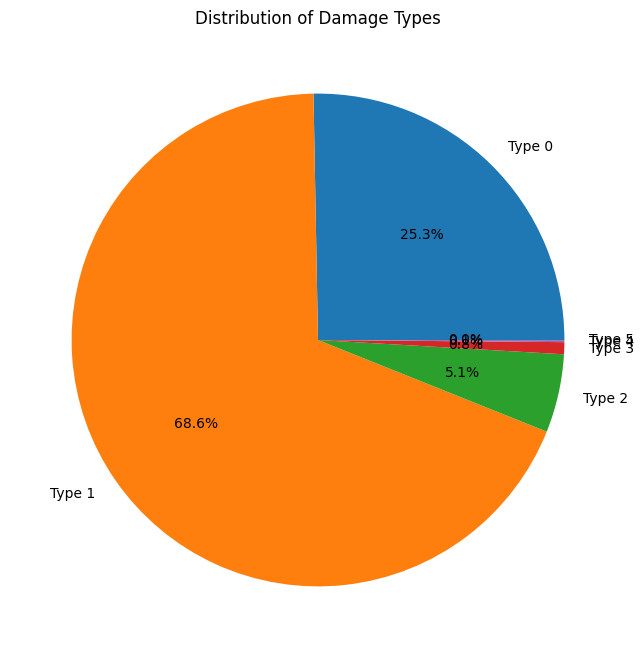

In [5]:
# Display the first few events
print("\n=== First 3 Events ===")
for idx, event in enumerate(events[:3]):
    print(f"\nEvent #{idx + 1}:")
    pp.pprint(event)

# Count different types of events
print("\n=== Event Statistics ===")
print(f"Total number of events: {len(events)}")

# If 'Damage Types' exists in events, analyze distribution
if events and 'Damage Types' in events[0]:
    damage_types = [event['Damage Types'][0] for event in events if 'Damage Types' in event]
    unique_types = set(damage_types)
    type_counts = {t: damage_types.count(t) for t in unique_types}
    print("\nDamage Type Distribution:")
    for damage_type, count in type_counts.items():
        print(f"Type {damage_type}: {count} events ({count/len(damage_types)*100:.2f}%)")
    
    # Plot damage type distribution as a pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(type_counts.values(), labels=[f"Type {t}" for t in type_counts.keys()], autopct='%1.1f%%')
    plt.title('Distribution of Damage Types')
    plt.show()

## 3. Multi-Run Analysis

Merge and analyze data from multiple simulation runs.

In [2]:
# Define file paths for multiple runs

filebases = [f'/home/radiofisica/hector/mytopassimulations/TOPAS_CellsNPs/work/CellColony-med0-cell0/cell1/run{i+1}/DNADamage' for i in range(100)]

# Merge data from multiple runs
merged_df = merge_dnadamage_files(filebases)

# Display the merged dataframe's summary
print("Merged DNA Damage data summary:")
print(f"Total events: {len(merged_df)}")
merged_df.describe()

Merged DNA Damage data summary:
Total events: 999


,Energy_imparted_per_event [keV],Dose_per_event_Gy,DSB/Gy/Gbp,SSB/Gy/Gbp,SB/Gy/Gbp,SSB+/Gy/Gbp,DSB+/Gy/Gbp,MoreComplexDamage/Gy/Gbp,BD/Gy/Gbp,DSBs,...,SBs_Indirect,SSB+s,DSB+s,More complex damages,BDs,BDs_Direct,BDs_QuasiDirect,BDs_Indirect,Foci_150nm,Foci_500nm
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.0,999.0,999.000000,999.000000,...,999.000000,999.000000,999.0,999.0,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,7.219695,0.018117,1.549464,40.934199,44.033127,1.087977,0.0,0.0,94.146914,0.100100,...,1.599600,0.078078,0.0,0.0,5.625626,1.232232,0.651652,4.393393,0.618619,0.607608
std,6.023889,0.012544,9.658053,74.963969,83.138606,8.805597,0.0,0.0,143.722100,0.337962,...,2.076165,0.293397,0.0,0.0,5.508964,1.682791,1.029025,4.266944,0.972412,0.952889
min,0.140538,0.000155,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.723040,0.008261,0.000000,4.093930,4.608895,0.000000,0.0,0.0,19.609250,0.000000,...,0.000000,0.000000,0.0,0.0,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,5.431580,0.016347,0.000000,16.803800,17.565500,0.000000,0.0,0.0,45.779300,0.000000,...,1.000000,0.000000,0.0,0.0,4.000000,1.000000,0.000000,3.000000,0.000000,0.000000
75%,9.864660,0.025793,0.000000,44.028400,49.717350,0.000000,0.0,0.0,107.784000,0.000000,...,2.000000,0.000000,0.0,0.0,8.000000,2.000000,1.000000,6.000000,1.000000,1.000000
max,40.784900,0.068546,249.946000,828.665000,1249.730000,249.946000,0.0,0.0,1795.600000,3.000000,...,14.000000,2.000000,0.0,0.0,39.000000,13.000000,8.000000,26.000000,5.000000,5.000000


Total damage statistics for merged data:
Total number of events: 999
Total energy deposited: 7.21 MeV
Total DSBs: 100
Total DSBs_Direct: 25
Total DSBs_Indirect: 20
Total DSBs_Hybrid: 55
Total DSBs_Direct_WithOneQuasiDirect: 11
Total DSBs_Direct_WithBothQuasiDirect: 1
Total DSBs_Hybrid_WithOneQuasiDirect: 25
Total SSBs: 2399
Total SSBs_Direct: 896
Total SSBs_QuasiDirect: 274
Total SSBs_Indirect: 1503
Total SBs: 2599
Total SBs_Direct: 1001
Total SBs_QuasiDirect: 312
Total SBs_Indirect: 1598
Total SSB+s: 78
Total DSB+s: 0
Total More complex damages: 0
Total BDs: 5620
Total BDs_Direct: 1231
Total BDs_QuasiDirect: 651
Total BDs_Indirect: 4389
Total Foci_150nm: 618
Total Foci_500nm: 607


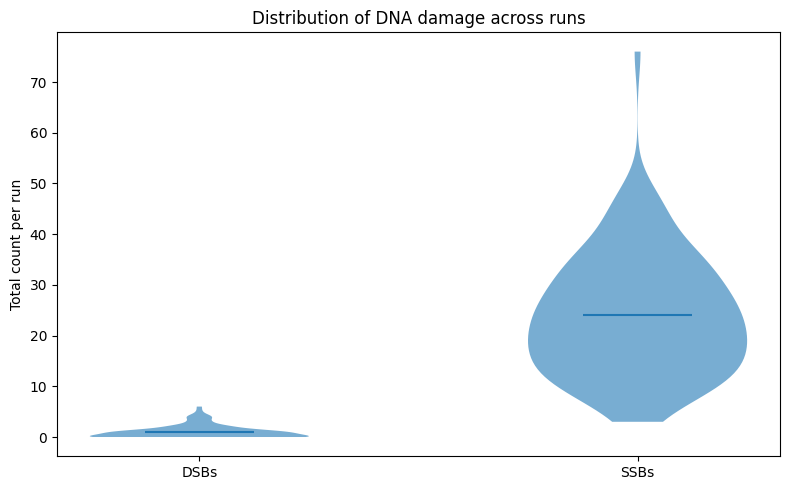

Run with maximum DSBs: run10  (total = 6)
Run with maximum SSBs: run77  (total = 76)


In [3]:
# Calculate total damage statistics for the merged data
print("Total damage statistics for merged data:")
total_damage(merged_df)

# ------------------------------------------------------------------------
# 1. Carga los resultados de cada run
# ------------------------------------------------------------------------
run_dfs = []
for base in filebases:
    run_name = os.path.basename(os.path.dirname(base))
    df = read_dnadamage_phase_space(base)
    run_dfs.append((run_name, df))

# ------------------------------------------------------------------------
# 2. Prepara los datos para violin plot
# ------------------------------------------------------------------------
damage_types = ['DSBs', 'SSBs']
available = [d for d in damage_types if all(d in df.columns for _, df in run_dfs)]

# Para cada tipo de daño, reúne la lista de totales run-a-run
violin_data = []
for dmg in available:
    totals = [df[dmg].sum() for _, df in run_dfs]
    violin_data.append(totals)

# ------------------------------------------------------------------------
# 3. Dibuja violines
# ------------------------------------------------------------------------
if violin_data:
    plt.figure(figsize=(8, 5))

    parts = plt.violinplot(
        violin_data,
        showmeans=True,        # punto de la media
        showmedians=False,
        showextrema=False
    )

    # Ajusta opacidad y contorno si lo deseas
    for pc in parts['bodies']:
        pc.set_alpha(0.6)

    # Etiquetas
    plt.xticks(np.arange(1, len(available) + 1), available)
    plt.ylabel('Total count per run')
    plt.title('Distribution of DNA damage across runs')
    plt.tight_layout()
    plt.show()
else:
    print("No common damage columns found in all runs.")


# ── Identify runs with the highest DSB and SSB totals ────────────────────
if not run_dfs:
    raise RuntimeError("run_dfs is empty – load the runs first.")

totals = {
    'DSBs': [],
    'SSBs': []
}

for run_name, df in run_dfs:
    if 'DSBs' in df.columns:
        totals['DSBs'].append((run_name, df['DSBs'].sum()))
    if 'SSBs' in df.columns:
        totals['SSBs'].append((run_name, df['SSBs'].sum()))

for damage_type, values in totals.items():
    if not values:
        print(f"No '{damage_type}' column found in the data.")
        continue

    # values = list of (run_name, total_count)
    run_max, val_max = max(values, key=lambda x: x[1])
    print(f"Run with maximum {damage_type}: {run_max}  (total = {val_max})")



## 4. Advanced Visualizations

Create more advanced visualizations of DNA damage data.

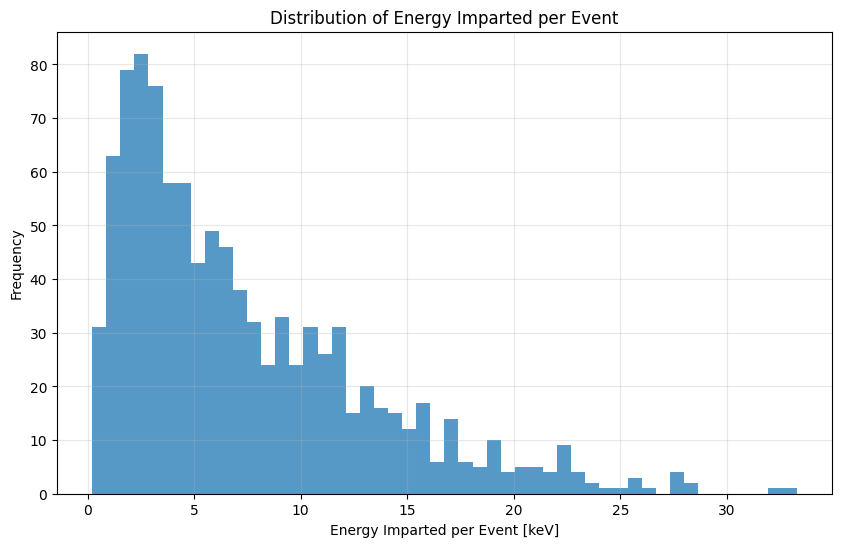

In [11]:
# Example: Plot histograms of energy imparted per event
if 'Energy_imparted_per_event [keV]' in merged_df.columns:
    plt.figure(figsize=(10, 6))
    plt.hist(merged_df['Energy_imparted_per_event [keV]'], bins=50, alpha=0.75)
    plt.xlabel('Energy Imparted per Event [keV]')
    plt.ylabel('Frequency')
    plt.title('Distribution of Energy Imparted per Event')
    plt.grid(True, alpha=0.3)
    plt.show()


## 5. Custom Analysis

Create a custom analysis specific to your research needs.

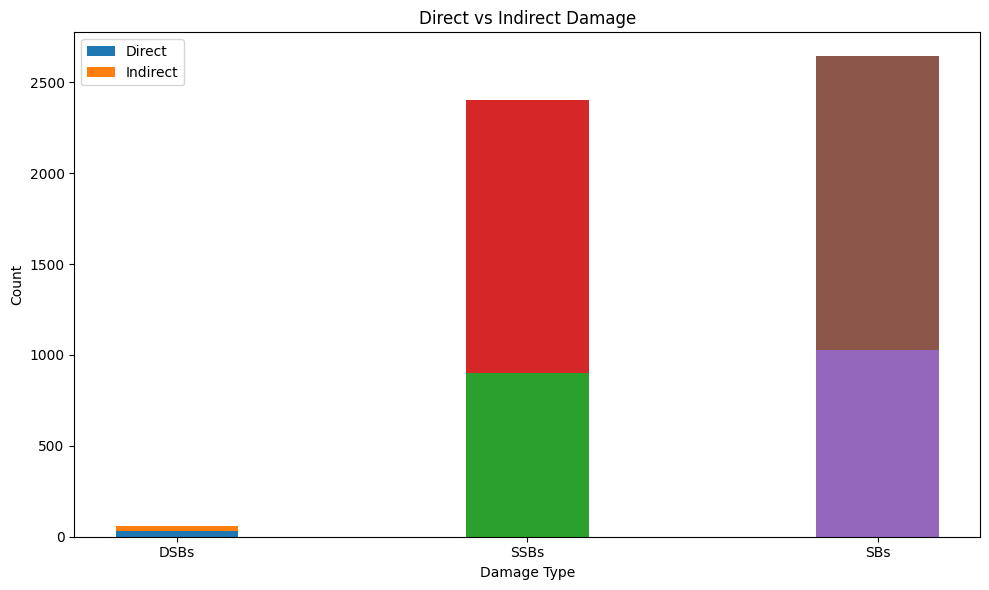

In [35]:
# Example: Analyze the ratio of direct vs indirect damage
damage_pairs = [
    ('DSBs_Direct', 'DSBs_Indirect'),
    ('SSBs_Direct', 'SSBs_Indirect'),
    ('SBs_Direct', 'SBs_Indirect')
]

valid_pairs = [(direct, indirect) for direct, indirect in damage_pairs 
                if direct in merged_df.columns and indirect in merged_df.columns]

if valid_pairs:
    ratios = {}
    for direct, indirect in valid_pairs:
        direct_sum = merged_df[direct].sum()
        indirect_sum = merged_df[indirect].sum()
        ratio = direct_sum / indirect_sum if indirect_sum > 0 else float('inf')
        total = direct_sum + indirect_sum
        direct_percent = direct_sum / total * 100 if total > 0 else 0
        indirect_percent = indirect_sum / total * 100 if total > 0 else 0
        
        base_name = direct.split('_')[0]  # Extract base name (DSBs, SSBs, etc.)
        ratios[base_name] = {
            'Direct': direct_sum,
            'Indirect': indirect_sum,
            'Ratio (Direct/Indirect)': ratio,
            'Direct %': direct_percent,
            'Indirect %': indirect_percent
        }
    
    # Display as a DataFrame
    ratio_df = pd.DataFrame(ratios).T
    ratio_df.round(2)
    
    # Create a stacked bar chart
    plt.figure(figsize=(10, 6))
    bar_width = 0.35
    x = np.arange(len(valid_pairs))
    labels = [pair[0].split('_')[0] for pair in valid_pairs]  # Extract base names
    
    for i, (direct, indirect) in enumerate(valid_pairs):
        direct_sum = merged_df[direct].sum()
        indirect_sum = merged_df[indirect].sum()
        plt.bar(i, direct_sum, bar_width, label='Direct' if i == 0 else "")
        plt.bar(i, indirect_sum, bar_width, bottom=direct_sum, label='Indirect' if i == 0 else "")
    
    plt.xlabel('Damage Type')
    plt.ylabel('Count')
    plt.title('Direct vs Indirect Damage')
    plt.xticks(x, labels)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [ ]:
# Additional custom analysis can be added here